# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [2]:
import pandas as pd

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

print(train_data.head())
print(test_data.head())

   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087   

         Y1        Y2  
0 -0.935902 -0.310081  
1 -0.089707 -0

## 2) Investigate the Dataset
In the datasets, you're given columns of time and A through N, each of which represent some sort of real-life market quantity. In the train dataset, you're also given Y1 and Y2, real-life market quantities you'd like to predict in terms of time and A through N. You're not given Y1 and Y2 in the test set, because this is what you're being asked to predict.

Let's do some exploration of the relationships of A - N and Y1. In particular, let's look at the relationship between C and Y1:

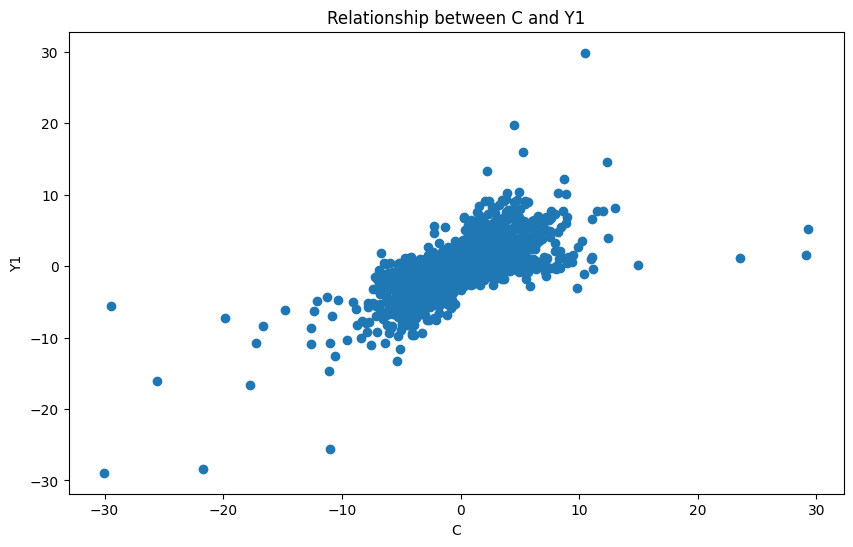

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_data['C'], train_data['Y1'])
plt.xlabel('C')
plt.ylabel('Y1')
plt.title('Relationship between C and Y1')
plt.show()

In [4]:
# Calculate correlation between C and Y1
correlation = train_data['C'].corr(train_data['Y1'])
print(f"Correlation between C and Y1: {correlation:.4f}")

Correlation between C and Y1: 0.7038


Clearly there's a strong relationship between C and Y1. You should definitely use C to predict Y1!

In [5]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



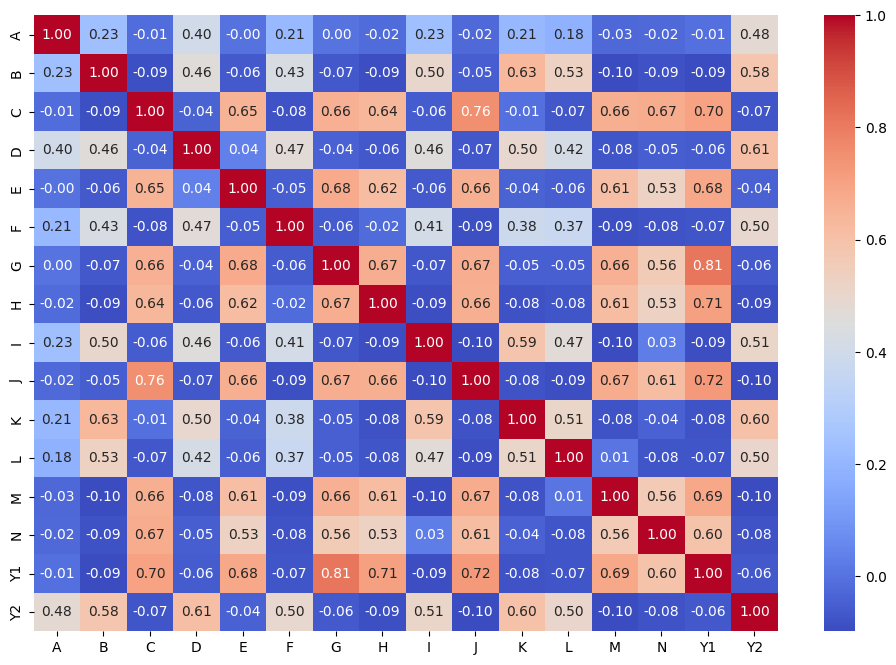

In [7]:
#heatmap correlation
plt.figure(figsize=(12,8))
corr = train_data.drop(columns=["time"]).corr()

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


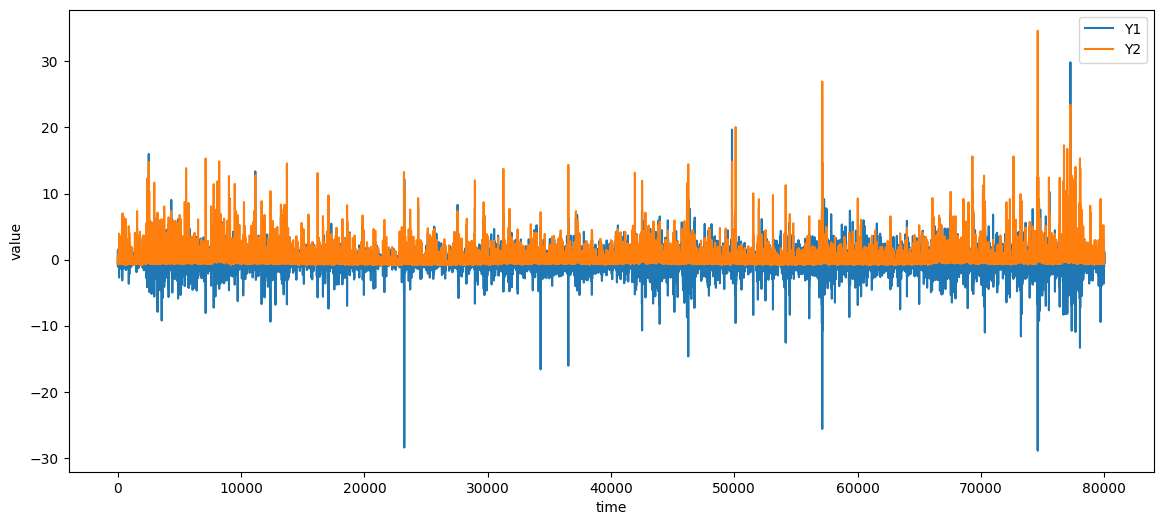

In [8]:
#seasonality
plt.figure(figsize=(14,6))
plt.plot(train_data["time"], train_data["Y1"], label = "Y1")
plt.plot(train_data["time"], train_data["Y2"], label = "Y2")
plt.legend()
plt.xlabel("time")
plt.ylabel("value")
plt.show()

In [9]:
#stationarity check
for target in ["Y1", "Y2"]:
    result = adfuller(train_data[target])
    print(f"{target} ADF Statistic: {result[0]}, p-value: {result[1]}")

Y1 ADF Statistic: -93.28155360183626, p-value: 0.0
Y2 ADF Statistic: -21.818635925583, p-value: 0.0


Stationary process is when properties don't change over time: mean, variance are constant. Y1 and Y2 are stationary

In [ ]:
#Ridge regression
#it is betther than lin regression sinc it deals with multicolinearity
#use variables which corr is ~50% and higher for beginning

#initial benchmark
#see later with adjusted alpha

X = train_data.drop(columns=["time", "Y1", "Y2"])
y1 = train_data["Y1"]
y2 = train_data["Y2"]
split_idx = int(0.7 * len(train_data))

features_y1 = ["C", "E", "G", "H", "J", "M", "N"]
features_y2 = ["A", "B", "D", "F", "I", "K", "L"]

X1_train = train_data[features_y1].iloc[:split_idx]
X1_test = train_data[features_y1].iloc[split_idx:]
X2_train = train_data[features_y2].iloc[:split_idx]
X2_test = train_data[features_y2].iloc[split_idx:]
y1_train, y1_test = y1.iloc[:split_idx], y1.iloc[split_idx:]
y2_train, y2_test = y2.iloc[:split_idx], y2.iloc[split_idx:]

ridge_1 = Ridge()
ridge_2 = Ridge()
ridge_1.fit(X1_train, y1_train)
ridge_2.fit(X2_train, y2_train)

y1_pred = ridge_1.predict(X1_test)
y2_pred = ridge_2.predict(X2_test)

r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
final_score = (r2_y1+r2_y2)/2
print(f'R2 Y1: {r2_y1:.4f}')
print(f'R2 Y2: {r2_y2:.4f}')
print(f'Final score (avg): {final_score:.4f}')

R2 Y1: 0.7255
R2 Y2: 0.5632
Final score (avg): 0.6443


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ridge_pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

param_grid = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}

grid_y1 = GridSearchCV(ridge_pipe, param_grid, scoring="r2")
grid_y1.fit(X1_train, y1_train)

grid_y2 = GridSearchCV(ridge_pipe, param_grid, scoring="r2")
grid_y2.fit(X2_train, y2_train)

print("Best alpha for Y1:", grid_y1.best_params_)
print("Best alpha for Y2:", grid_y2.best_params_)


Best alpha for Y1: {'ridge__alpha': 0.01}
Best alpha for Y2: {'ridge__alpha': 100}


In [17]:
#adjusted alpha
y1_pred = grid_y1.best_estimator_.predict(X1_test)
y2_pred = grid_y2.best_estimator_.predict(X2_test)
r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
final_score = (r2_y1+r2_y2)/2
print(f'R2 for y1: {r2_y1:.4f}')
print(f'R2 for y2: {r2_y2:.4f}')
print(f'final score (avg): {final_score:.4f}')

R2 for y1: 0.7255
R2 for y2: 0.5632
final score (avg): 0.6443


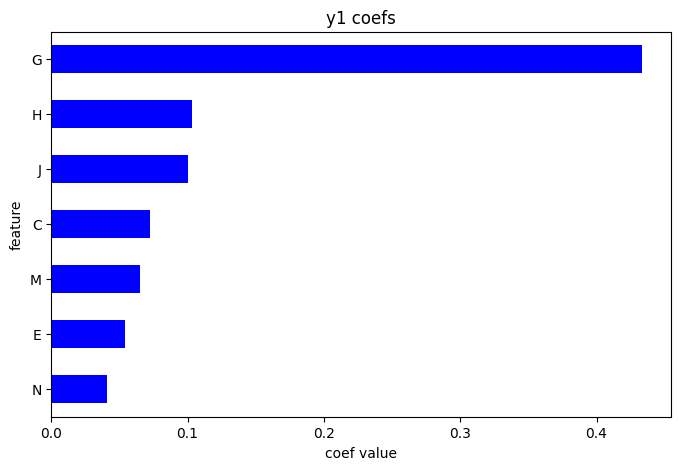

y1 coef:
 N    0.041030
E    0.054153
M    0.065035
C    0.072542
J    0.100418
H    0.103326
G    0.433175
dtype: float64


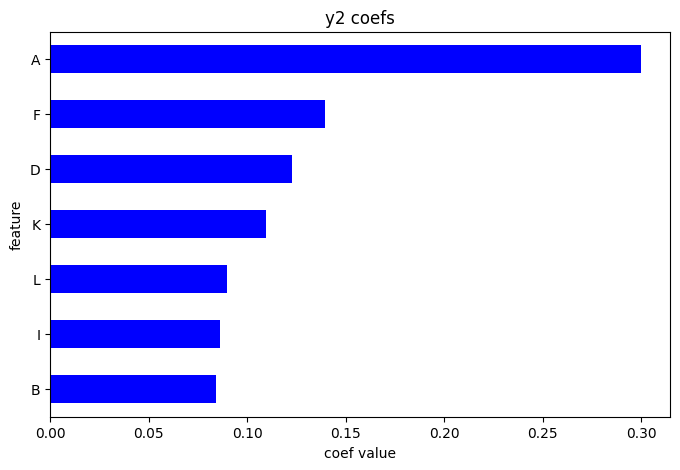

y2 coef:
 B    0.083996
I    0.086355
L    0.089706
K    0.109551
D    0.122582
F    0.139487
A    0.299706
dtype: float64


In [20]:
#see coefs
coef_y1 = grid_y1.best_estimator_.named_steps["ridge"].coef_
importance_y1 = pd.Series(coef_y1, index = X1_train.columns).sort_values()
plt.figure(figsize=(8,5))
importance_y1.plot(kind='barh', color='blue')
plt.title('y1 coefs')
plt.xlabel('coef value')
plt.ylabel('feature')
plt.show()
print('y1 coef:\n', importance_y1)

coef_y2 = grid_y2.best_estimator_.named_steps["ridge"].coef_
importance_y2 = pd.Series(coef_y2, index = X2_train.columns).sort_values()
plt.figure(figsize=(8,5))
importance_y2.plot(kind='barh', color='blue')
plt.title('y2 coefs')
plt.xlabel('coef value')
plt.ylabel('feature')
plt.show()
print('y2 coef:\n', importance_y2)


In [21]:
#add lags to see if time series improves model
df = train_data.copy()
for lag in [1,3,5]:
    df[f'G_lag{lag}']=df["G"].shift(lag)
    df[f'A_lag{lag}']=df["A"].shift(lag)
df=df.dropna().reset_index(drop=True)

features_y1 = ["C", "E", "G", "H", "J", "M", "N", "G_lag1", "G_lag3", "G_lag5"]
features_y2 = ["A", "B", "D", "F", "I", "K", "L", "A_lag1", "A_lag3", "A_lag5"]
split_idx=int(0.7*len(df))

X1_train, X1_test = df[features_y1].iloc[:split_idx], df[features_y1].iloc[split_idx:]
X2_train, X2_test = df[features_y2].iloc[:split_idx], df[features_y2].iloc[split_idx:]
y1_train, y1_test = df["Y1"].iloc[:split_idx], df["Y1"].iloc[split_idx:]
y2_train, y2_test = df["Y2"].iloc[:split_idx], df["Y2"].iloc[split_idx:]

ridge_pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

param_grid = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}

grid_y1 = GridSearchCV(ridge_pipe, param_grid, scoring="r2")
grid_y1.fit(X1_train, y1_train)

grid_y2 = GridSearchCV(ridge_pipe, param_grid, scoring="r2")
grid_y2.fit(X2_train, y2_train)

print("Best alpha for Y1:", grid_y1.best_params_)
print("Best alpha for Y2:", grid_y2.best_params_)
#adjusted alpha
y1_pred = grid_y1.best_estimator_.predict(X1_test)
y2_pred = grid_y2.best_estimator_.predict(X2_test)
r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
final_score = (r2_y1+r2_y2)/2
print(f'R2 for y1: {r2_y1:.4f}')
print(f'R2 for y2: {r2_y2:.4f}')
print(f'final score (avg): {final_score:.4f}')

Best alpha for Y1: {'ridge__alpha': 0.01}
Best alpha for Y2: {'ridge__alpha': 100}
R2 for y1: 0.7254
R2 for y2: 0.5660
final score (avg): 0.6457


## 3) Submit Predictions
In order to submit predictions, we need to make a CSV file with three columns: id, Y1, and Y2. In the below example, we let our predictions of Y1 and Y2 be the means of Y1 and Y2 in the train set.

In [29]:
preds = test_data[['id']]
preds['Y1'] = train_data['Y1'].mean()
preds['Y2'] = train_data['Y2'].mean()
preds

/var/folders/4g/v53gt38d68ldbz6gyhcgdc700000gn/T/ipykernel_92290/2816426628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = train_data['Y1'].mean()
/var/folders/4g/v53gt38d68ldbz6gyhcgdc700000gn/T/ipykernel_92290/2816426628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = train_data['Y2'].mean()


,id,Y1,Y2
0,1,-0.002807,-0.061172
1,2,-0.002807,-0.061172
2,3,-0.002807,-0.061172
3,4,-0.002807,-0.061172
4,5,-0.002807,-0.061172
...,...,...,...
15991,15992,-0.002807,-0.061172
15992,15993,-0.002807,-0.061172
15993,15994,-0.002807,-0.061172
15994,15995,-0.002807,-0.061172


In [30]:
# save preds to csv
preds.to_csv('preds.csv', index=False)

You should now be able to submit preds.csv to [https://quantchallenge.org/dashboard/data/upload-predictions](https://quantchallenge.org/dashboard/data/upload-predictions)! Note that you should receive a public $R^2$ score of $-0.042456$ with this set of predictions. You should try to get the highest possible $R^2$ score over the course of these next few days. Be careful of overfitting to the public score, which is only calculated on a subset of the test data—the final score that counts is the private $R^2$ score!